In [1]:
import re
import sys
sys.path.append("./")
# sys.path.append("./modules/")
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from models import *
from my_util import *
from preprocess_block import *

train = pd.read_csv("./train_with_ido.csv")
train = train.dropna(subset=["賃料"])
train = train.drop(20926)
train = train.drop(20231)
train = train.drop(20427)
train = train.drop(5775)
train = train.drop("Unnamed: 0",axis=1)

test = pd.read_csv("./test_with_ido.csv")
test = test.drop("Unnamed: 0",axis=1)

train_height = pd.read_csv("./train_height.csv",header=None)
train_height = train_height.values[0][:-1]
test_height = pd.read_csv("./test_height.csv",header=None)
test_height = test_height.values[0][:-1]

train = train.assign(field_height=train_height)
test = test.assign(field_height=test_height)

train_x = train.drop("賃料",axis=1)
train_y = train["賃料"]

train_rich = train.query("賃料>300000")
rich_x = train_rich.drop("賃料",axis=1)
rich_y = train_rich["賃料"]

hoge, x_small, fuga, y_small = train_test_split(train_x, train_y,test_size=3000)

/Users/kakeru/PycharmProjects/main_env/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
Using TensorFlow backend.


In [2]:
comment = """feature_selection 暫定"""
check_model(comment,train_x,train_y,write_importance=False)

[18:21:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:23:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:24:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:26:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19040.35491702 14891.48172726 17568.69427134 13968.95727945]


In [2]:
comment = """FS"""
check_linear(comment,train_x,train_y,write_importance=False)

/Users/kakeru/PycharmProjects/main_env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4622636250824.867, tolerance: 12572536557.474289
  positive)
/Users/kakeru/PycharmProjects/main_env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/kakeru/PycharmProjects/main_env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6269010810216.62, tolerance: 12984335208.90241
  positive)
/Users/kakeru/PycharmProjects/main_env/lib/python3.7/site-packages/sklearn/linear_model/coord

[27159.55976535 25319.53101015 28688.39094782 26235.5294889 ]


In [2]:
temp = linear_model()
temp.fit(train_x,train_y)
coef = temp.model[-1].coef_

no = []
for i in range(len(coef)):
    if coef[i] == 0:
        no.append(i)

/Users/kakeru/PycharmProjects/main_env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7839176750418.885, tolerance: 16994639256.281582
  positive)


In [7]:
print(coef)

[-4.20920062e+03  4.11524172e+03  1.02129135e+02  2.07615031e+04
  5.46338148e+04 -5.08172613e+03  1.66130449e+04  3.97306372e+03
  1.13897265e+04  3.63852035e+03 -1.64163451e+04  2.77387673e+03
  2.64632591e+03  1.21754528e+03 -2.94317597e+02 -3.43239697e+03
 -7.38090900e+02  1.15742386e+02 -2.70970184e+02  1.38331499e+02
 -3.23643703e+02  6.62623758e+02 -2.17963866e+02  3.47307814e+02
 -5.19119117e+01  1.30914006e+02  4.29871817e+01 -9.83898395e+02
 -6.48824718e+02 -5.60738592e+01  0.00000000e+00 -2.15544276e+02
 -1.07131725e+03 -1.70366372e+02 -3.86250735e+02 -4.39710175e+01
  1.89864240e+02  0.00000000e+00 -5.43242544e+01  1.28075634e+02
  3.96954398e+02 -1.89768199e+02  4.13333917e+02 -5.98167134e+01
 -3.32940550e+01  1.65984566e+01  4.73507465e+01 -2.58614375e+01
 -6.14986510e+01  1.41952872e+02 -1.25001462e+02 -1.19920480e+02
  2.24233847e+02  4.05406685e+02 -6.66648912e+02 -1.46982083e+02
  4.12145720e+02  1.13791358e+02 -9.24564412e+02 -1.54837562e+02
 -7.25429131e+02 -2.62859

In [3]:
rp = my_linear()
rpstep = rp.steps
pp_steps = [
    ("pre",Pipeline(steps=rpstep)),
    ("dummy",dummy())
]
preprocess = Pipeline(steps=pp_steps)
preprocess.fit(train_x,train_y)

Pipeline(memory=None,
         steps=[('pre',
                 Pipeline(memory=None,
                          steps=[('parse_area',
                                  <indep.parse_area_size object at 0x13228e290>),
                                 ('parse_room',
                                  <indep.parse_rooms object at 0x13228e5d0>),
                                 ('parse_old',
                                  <indep.parse_how_old object at 0x13228e490>),
                                 ('height_enc',
                                  <indep.height_encoder object at 0x13228e390>),
                                 ('ex_dist',
                                  <two_step.extract_district object at 0x13228e510>),
                                 ('la...
                                  <agg.add_moyori_walk_price object at 0x1322815d0>),
                                 ('angle_stat',
                                  <agg.add_mean_angle_price object at 0x132281590>),
            

In [4]:
hoge = preprocess.predict(train_x)
print(hoge.columns)

Index(['ido', 'keido', 'field_height', 'mf_areasize', 'mf_area_sq', 'mf_r',
       'mf_l', 'mf_d', 'mf_k', 'mf_s',
       ...
       'structure_oh7', 'structure_oh8', 'angle_oh0', 'angle_oh1', 'angle_oh2',
       'angle_oh3', 'angle_oh4', 'angle_oh5', 'angle_oh6', 'angle_oh7'],
      dtype='object', length=297)


In [5]:
buf = []
for i in no:
    buf.append(hoge.columns[i])

In [6]:
print(buf)

['train_walk_11', 'train_walk_18', 'info_sum', 'fac29', 'fac_sum', 'kit1', 'kit2', 'kit4', 'kit9', 'kit15', 'dist_p_max', 'dist_p_min', 'dist_mm', 'moyo_mm', 'ang_p_mean', 'ang_p_min', 'str_p_mean', 'str_p_medi', 'str_p_min', 'dist_oh0', 'structure_oh4', 'angle_oh1', 'angle_oh2', 'angle_oh6']


In [2]:
temp = my_model()
temp.fit(train_x,train_y)

[17:48:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [3]:
d1 = temp.model[-1].get_booster().get_score(importance_type='gain')

In [8]:
th =  1000000000
th2 = 5000000000
buf = set()
buf2= set()
for key in d1.keys():
    if d1[key] < th:
        buf.add(key)
    if d1[key] < th2:
        buf2.add(key)
print(buf)

{'envv0', 'info1', 'bath3', 'tr_wa_nmf34', 'keido', 'envv7', 'lda2', 'tr_wa_nmf2', 'ang_p_medi', 'envv8', 'tr_wa_nmf15', 'info_sum', 'ido', 'fac_nmf18', 'kit3', 'tr_wa_nmf1', 'lda3', 'envv4', 'lda1', 'info6', 'kit14', 'bath0', 'tr_wa_nmf7', 'kit8', 'info0', 'walk3', 'mf_r', 'kit12', 'tr_wa_nmf25', 'tr_wa_nmf6', 'kit16', 'kit0', 'tr_wa_nmf26', 'envv12', 'has_under', 'bath1', 'envv11', 'info2', 'mf_k', 'fac_nmf15', 'tr_wa_nmf0', 'envv6', 'envv5', 'info5', 'envv14', 'lda0', 'field_height', 'info3', 'envv1', 'kit13', 'walk_p_min', 'fac_nmf3', 'info4', 'fac_nmf4', 'walk2', 'fac_nmf9', 'tr_wa_nmf32', 'tr_wa_nmf30', 'walk_mm', 'fac_nmf19', 'kit7', 'ang_p_mean', 'fac_nmf0', 'mf_angle'}


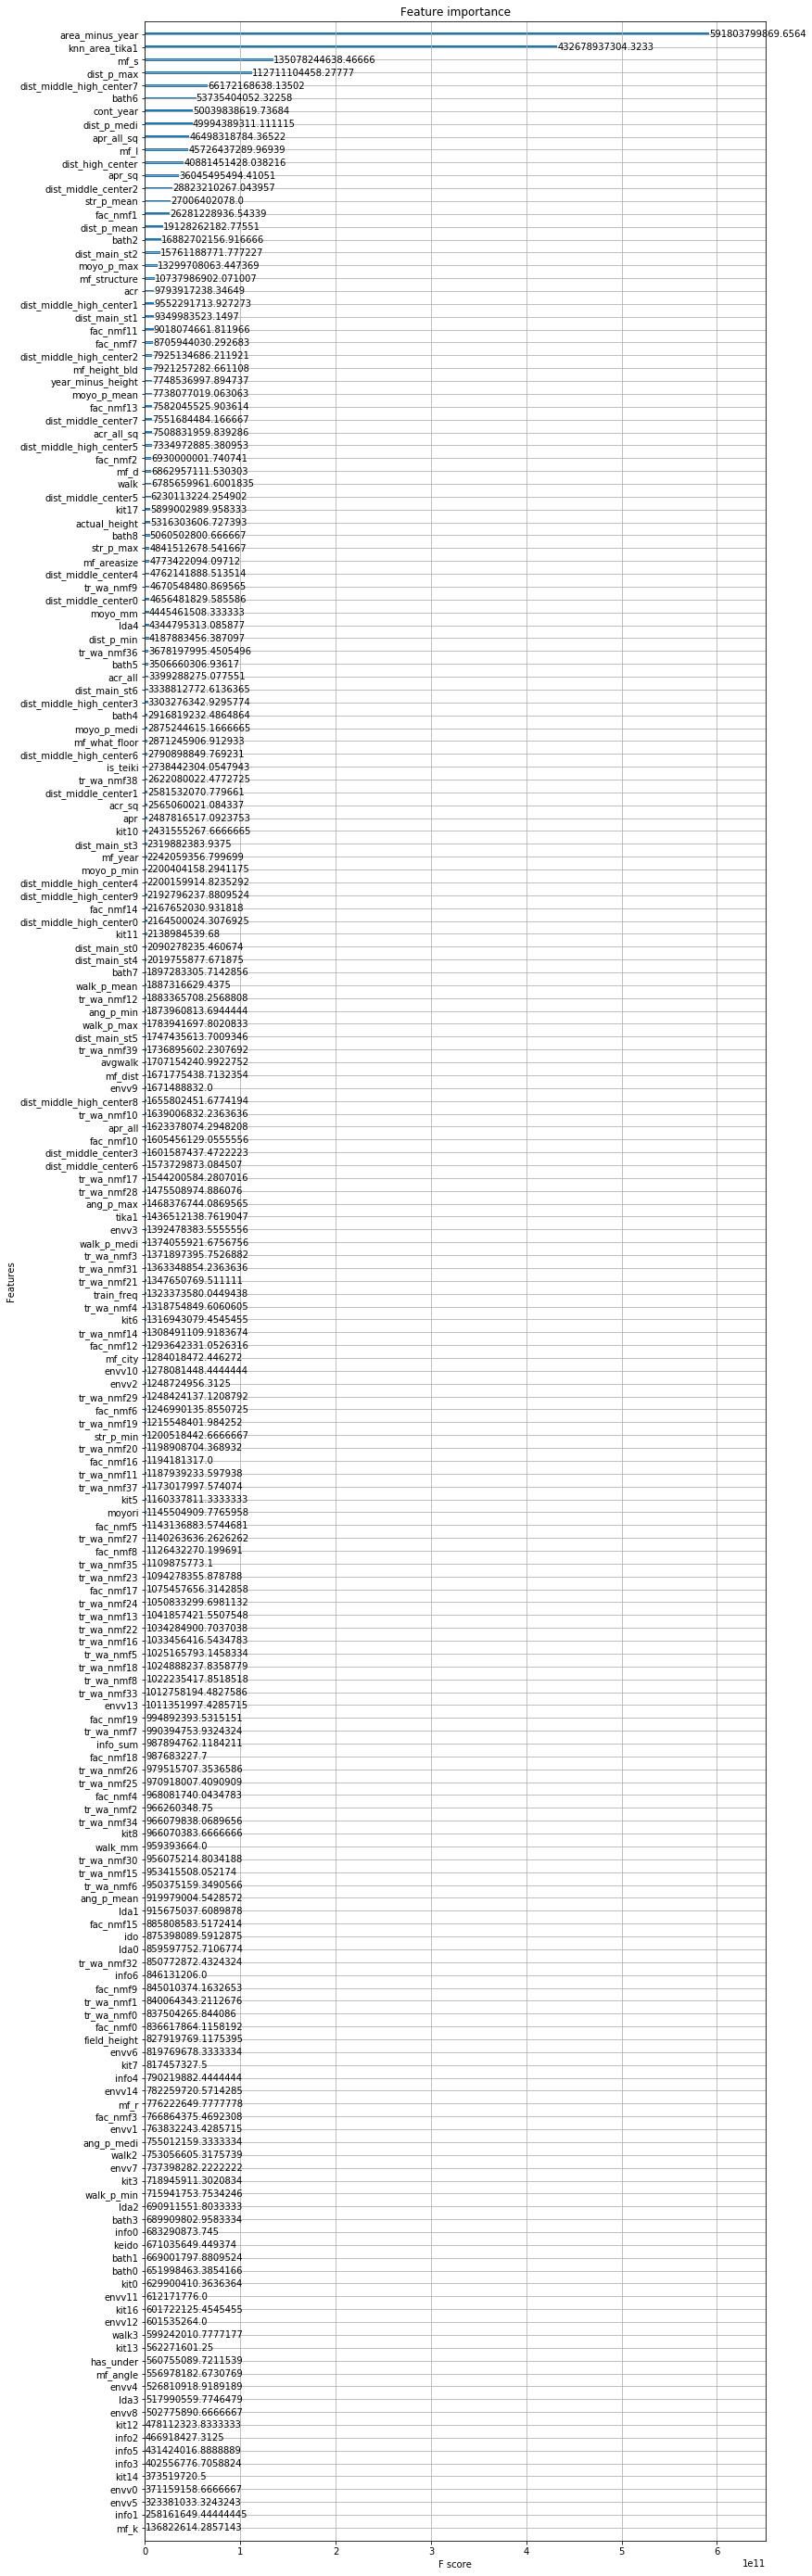

In [6]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(12, 50))
xgb.plot_importance(temp.model[-1],
                    ax=ax,
                    importance_type='gain',
                    show_values=True)
plt.show()

In [2]:
temp = classify_model()
temp.fit(x_small,y_small)

In [30]:
check_y = fuga.values[:3000]
check_x = hoge[:3000]
check_y = np.where(check_y > 200000,1,0)
temp.predict(check_x)
out = np.loadtxt("7777_class_test.csv")
out = out.T[1]
mask_out = out > 0.5
mm_o = out <= 0.5
out[mm_o] = 0
out[mask_out] = 1

In [31]:
print(out[:100])
print(check_y[:100])
ok =0
for i in range(len(out)):
    if out[i] == check_y[i]:
        ok += 1
print(np.sum(check_y))
print(ok)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
250
2927


In [2]:
comment = """SVRチェック C=3 eps = 0.1 正則化がうまくかかってなかったので再度確認"""
check_linear(comment,train_x,train_y,write_importance=False)

/Users/kakeru/PycharmProjects/main_env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/kakeru/PycharmProjects/main_env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


[76048.71615215 72579.38541254 76118.22737435 73757.56750547]


In [3]:
class temp_model:
    def __init__(self,seed=7777):
        rp = my_linear()
        # rp = my_preprocess(seed)
        rpstep = rp.steps
        rich_step_xgb = [
            ("pre",Pipeline(steps=rpstep)),
            ("dummy",dummy_scale()),
            ("xgb",Ridge(max_iter=3000,alpha=0.005))
        ]
        self.model = Pipeline(steps=rich_step_xgb)
    def fit(self,x,y):
        self.model.fit(x,y)
    def predict(self,x):
        pred = self.model.predict(x)
        return pred
    def get_params(self,deep=True):
        return {}

scores = cross_val_score(_model(),train_x,train_y,scoring="neg_mean_squared_error",cv=4)
scores = np.sqrt(-np.array(scores))

In [4]:
print(scores)

[27580.67751572 25323.94215838 28738.0582301  28490.67660234]


In [2]:
scores = cross_val_score(nn_model(),train_x,train_y,scoring="neg_mean_squared_error",cv=4)
scores = np.sqrt(-np.array(scores))


Epoch 1/100
23596/23596 [==============================] - 1s 33us/step - loss: 14386863394.5442
Epoch 2/100
23596/23596 [==============================] - 1s 26us/step - loss: 2386831552.1193
Epoch 3/100
23596/23596 [==============================] - 1s 27us/step - loss: 1373269261.2361
Epoch 4/100
23596/23596 [==============================] - 1s 24us/step - loss: 1068724144.7405
Epoch 5/100
23596/23596 [==============================] - 1s 25us/step - loss: 973242970.4669
Epoch 6/100
23596/23596 [==============================] - 1s 30us/step - loss: 928032874.8005
Epoch 7/100
23596/23596 [==============================] - 1s 37us/step - loss: 882110331.2372
Epoch 8/100
22784/23596 [===========================>..] - ETA: 0s - loss: 839721646.4719

KeyboardInterrupt: 

In [6]:
x_small,x_valid,y_small,y_valid = train_test_split(train_x,train_y,random_state=3419,test_size=0.9)
x_small.info()
hoge = stacking_model()
print(hoge.nn_submodel)
# hoge.fit(x_small,y_small)
# pred = hoge.predict(x_small)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3146 entries, 30335 to 13262
Data columns (total 19 columns):
id              3146 non-null int64
所在地             3146 non-null object
アクセス            3146 non-null object
間取り             3146 non-null object
築年数             3146 non-null object
方角              2874 non-null object
面積              3146 non-null object
所在階             3146 non-null object
バス・トイレ          3119 non-null object
キッチン            3093 non-null object
放送・通信           2787 non-null object
室内設備            3142 non-null object
駐車場             2604 non-null object
周辺環境            2199 non-null object
建物構造            3146 non-null object
契約期間            2419 non-null object
ido             3146 non-null float64
keido           3146 non-null float64
field_height    3146 non-null float64
dtypes: float64(3), int64(1), object(15)
memory usage: 491.6+ KB
[<keras.engine.sequential.Sequential object at 0x1368a7e90>, <keras.engine.sequential.Sequential object at 0x1368a7450

In [3]:
print(scores)

[19594.62081199 20067.09794319 20664.36347653 16578.57768467]


In [2]:
comment = """alpha0.005"""
check_linear(comment,train_x,train_y,write_importance=False)

[27580.67753372 25323.94259804 28738.0581001  28490.67602244]


In [2]:
# x_small,x_valid,y_small,y_valid = train_test_split(rich_x,rich_y,random_state=48321)
x_small,x_valid,y_small,y_valid = train_test_split(train_x,train_y,random_state=3419)
model = my_model()
model.fit(x_small,y_small)
pred = model.predict(x_valid)
hoge = x_valid.assign(abs_diff = abs(y_valid.values-pred))
hoge= hoge.assign(diff = y_valid.values-pred)
hoge = hoge.assign(pred=pred)
hoge = hoge.assign(actual=y_valid.values)
hoge = hoge.sort_values("abs_diff",ascending= False)
hoge[:100].to_csv("human_check.csv")

[21:38:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
[-2.14537648e-01  2.50271827e-01  1.94577331e-01 -4.03536132e-02
  5.14592621e-02 -3.11691952e-02  4.57276098e-03  7.42165942e-02
 -7.12052099e-02 -7.85250719e-02  1.68982662e-01 -4.29794433e-01
  8.65043068e-01  3.09244632e-01  3.33635635e-03  8.35728978e-03
  9.92592578e-03  7.50003344e-04 -1.17708580e-02 -8.08448629e-02
  2.14961634e-01  4.36554187e-02 -6.23544880e-02 -1.22497967e-01]

In [3]:
commit(train_x,train_y,test,"submit_23",seeds=[7777,8888,5555])

0
[00:41:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1
[00:45:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2
[00:49:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
class lda:
    def __init__(self):
        self.lda = None
        self.dic = None
    def fit(self,x,y):
        corp = []
        data = x[["バス・トイレ","キッチン","室内設備","district"]].values
        pat = re.compile(r"／")
        for i in range(len(data)):
            temp = []
            for j in range(3):
                if data[i][j] == data[i][j]:
                    blocks = data[i][j].split()
                    for b in blocks:
                        txt = pat.sub("",b)
                        if txt != "":
                            temp.append(txt)
                else:
                    continue
            corp.append(temp)
        self.dic = Dictionary(corp)
        corpus = [self.dic.doc2bow(s) for s in corp]
        self.lda = LdaModel(corpus = corpus, id2word = self.dic, num_topics = 5, random_state = 1,alpha=0.05)
        return self
    def transform(self,x):
        corp = []
        data = x[["バス・トイレ","キッチン","室内設備","district"]].values
        pat = re.compile(r"／")
        for i in range(len(data)):
            temp = []
            for j in range(3):
                if data[i][j] == data[i][j]:
                    blocks = data[i][j].split()
                    for b in blocks:
                        txt = pat.sub("",b)
                        if txt != "":
                            temp.append(txt)
                else:
                    continue
            corp.append(temp)
        buf = [[0 for i in range(5)] for j in range(len(x.values))]
        for i in range(len(corp)):
            temp = []
            fuga = self.lda[self.dic.doc2bow(corp[i])]
            for lin in fuga:
                buf[i][lin[0]] = lin[1]
        setubi = pd.DataFrame(buf)
        c_num = len(setubi.columns)
        col = []
        for i in range(c_num):
            col.append("lda"+str(i))
        setubi.columns = col
        hoge = x.copy()
        setubi.index = hoge.index
        hoge =  pd.concat([hoge,setubi],axis = 1)
        return hoge
def address_of_it_(x):
    pat = re.compile(r"東京都.+区")
    p2 = re.compile(r"区.+?[0-9|０-９]丁目")
    p3 = re.compile(r"区.+?町")
    p4 = re.compile(r"区.+?[0-9|０-９]")
    dist = ["" for i in range(len(x.values))]
    area = ["" for i in range(len(x.values))]
    tmp = x["所在地"].values
    for i in range(len(tmp)):
        m = pat.search(tmp[i])
        dist[i] = m[0][3:]
        m = p2.search(tmp[i])
        if m:
            area[i] = m[0][1:-3]
        else:
            m = p3.search(tmp[i])
            if m:
                area[i] = m[0][1:]
            else:
                m = p4.search(tmp[i])
                if m:
                    area[i] = m[0][1:-1]
    return dist,area

class extract_district:
    def __init__(self):
        pass
    def fit(self,x,y):
        return self
    def transform(self,x):
        dist,area = address_of_it_(x)
        hoge = x.copy()
        hoge = hoge.drop("所在地",axis = 1)
        hoge = hoge.assign(district=dist)
        hoge = hoge.assign(city = area)
        return hoge
temp = extract_district()
temp2 = lda()
hoge = temp.transform(train)
temp2.fit(hoge,[])
hoge = temp2.transform(hoge)


[[0, 0, 0.029850237, 0.9627423, 0], [0, 0, 0, 0.9859649, 0], [0, 0, 0, 0.8127211, 0.18109336], [0, 0.30982473, 0.68147963, 0, 0], [0, 0, 0.69773775, 0, 0.29001722]]


In [ ]:
buf= []
for col in hoge.columns:
    if "lda" in col:
        buf.append(col)
hoge[col].head()

In [3]:
train_height = pd.read_csv("./train_height.csv",header=None)
train_height = train_height.values[0][:-1]
test_height = pd.read_csv("./test_height.csv",header=None)
test_height = test_height.values[0][:-1]
print(len(train_height))
print(len(test_height))

31462
31262


In [4]:
test.count()

id        31262
所在地       31262
アクセス      31262
間取り       31262
築年数       31262
方角        28454
面積        31262
所在階       31261
バス・トイレ    30942
キッチン      30627
放送・通信     27808
室内設備      31189
駐車場       25906
周辺環境      22021
建物構造      31262
契約期間      24281
ido       31262
keido     31262
dtype: int64

In [30]:
df.head()

,ido,keido,price
952,35.742359,139.570052,325000
953,35.729468,139.570256,362000
963,35.733581,139.573902,346000
964,35.757737,139.573904,256000
968,35.722818,139.574655,490000


In [28]:

df.count()

ido      712
keido    712
price    712
dtype: int64

In [45]:
def build_year_decoder(txt):
    is_heisei = False
    if "平成" in txt:
        is_heisei = True
    hoge = re.search(r"[0-9０-９]+",txt)
    if hoge:
        hoge = int(hoge[0])
    else:
        hoge = 1
    if is_heisei:
        base = 1988
    else:
        base = 1925
    built = base+hoge
    return 2019-built

In [96]:
df = pd.read_csv("./hudousan_2017_1_2019_1.csv")
df = df.dropna(subset=["今後の利用目的","建築年","間取り","市区町村名","最寄駅：距離（分）","面積（㎡）"])
df = df[df["今後の利用目的"].str.contains("住宅")]
df = df[df["市区町村名"].str.contains("区")]
df = df[["市区町村名","地区名","最寄駅：距離（分）","取引価格（総額）","間取り","面積（㎡）","建築年"]]

hoge = df["建築年"].values
buf = [0 for i in range(len(hoge))]
for i in range(len(hoge)):
    buf[i] = build_year_decoder(hoge[i])

df = df.drop("建築年",axis=1)
df = df.assign(old=buf)

In [98]:
df.count()

市区町村名        22208
地区名          22208
最寄駅：距離（分）    22208
取引価格（総額）     22208
間取り          22208
面積（㎡）        22208
old          22208
dtype: int64

In [84]:
def address_of_it_(x):
    pat = re.compile(r"東京都.+区")
    p2 = re.compile(r"区.+?[0-9|０-９]丁目")
    p3 = re.compile(r"区.+?町")
    p4 = re.compile(r"区.+?[0-9|０-９]")
    dist = ["" for i in range(len(x.values))]
    area = ["" for i in range(len(x.values))]
    tmp = x["所在地"].values
    for i in range(len(tmp)):
        m = pat.search(tmp[i])
        dist[i] = m[0][3:]
        m = p2.search(tmp[i])
        if m:
            area[i] = m[0][1:-3]
        else:
            m = p3.search(tmp[i])
            if m:
                area[i] = m[0][1:]
            else:
                m = p4.search(tmp[i])
                if m:
                    area[i] = m[0][1:-1]
    return dist,area
class extract_district:
    def __init__(self):
        pass
    def fit(self,x,y):
        return self
    def transform(self,x):
        dist,area = address_of_it_(x)
        hoge = x.copy()
        hoge = hoge.drop("所在地",axis = 1)
        hoge = hoge.assign(district=dist)
        hoge = hoge.assign(city = area)
        return hoge

In [85]:
temp = extract_district()
hoge = temp.transform(train)

In [92]:
a = set(hoge["city"].unique())

In [93]:
b = set(df["地区名"].unique())

In [94]:
print(a-b)

{'', '3-', '片町', '千駄ヶ谷', '神田練塀町', '富ヶ谷', '幡ヶ谷', '紀尾井町', '西ヶ原', '三栄町', '神南', '揚場町', '鍛冶町', '関町', '桐ヶ丘', '羽田旭町', '日ノ出町', '神田美土代町', '神田西福田町', '神田紺屋町', '愛宕', '東榎町', '堀之内'}


In [40]:
df.head()

,市区町村名,地区名,最寄駅：距離（分）,取引価格（総額）,間取り,面積（㎡）,建築年
0,千代田区,飯田橋,3,24000000,１ＬＤＫ,35,昭和60年
1,千代田区,飯田橋,4,13000000,１Ｋ,20,昭和57年
3,千代田区,飯田橋,3,22000000,１Ｋ,30,昭和60年
4,千代田区,飯田橋,1,69000000,２ＬＤＫ,70,昭和59年
7,千代田区,飯田橋,4,45000000,１ＬＤＫ,45,昭和57年


In [2]:
comment = """elastic net"""
check_nn(comment,train_x,train_y)

[29820.89148608 25508.78508811 29149.0942691  24828.6590633 ]


In [ ]:
ridge
[25069.32411078 21772.64874326 22907.98359895 20810.2771734 ]
elastic net
[29820.89148608 25508.78508811 29149.0942691  24828.6590633 ]
lasso
[28236.78496342 26278.71400056 30587.13911905 28911.92178873]
nn
[32465.61245262 26831.62645537 32918.01658902 25516.8817778]

In [2]:
"""差分予測を足す対象を30マン異常に変更　かつ誤差予測10マン以上"""
scores = cross_val_score(split_double_predict_model(),train_x,train_y,scoring="neg_mean_squared_error",cv=4)
scores = np.sqrt(-np.array(scores))
print(scores)

[21:34:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/kakeru/PycharmProjects/main_env/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[21:37:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

/Users/kakeru/PycharmProjects/main_env/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[22:01:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:01:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:02:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:02:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:04:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:04:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:04:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [2]:
"""差分予測を足す対象を20マン以上かつ、誤差予測が2マンを超えるやつに限定"""
scores = cross_val_score(split_double_predict_model(),train_x,train_y,scoring="neg_mean_squared_error",cv=4)
scores = np.sqrt(-np.array(scores))
print(scores)

[13:23:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:24:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [2]:
"""あとから差分予測を足すやつ。ただし20マン以上の物件に限る"""
scores = cross_val_score(split_double_predict_model(),train_x,train_y,scoring="neg_mean_squared_error",cv=4)
scores = np.sqrt(-np.array(scores))
print(scores)

[12:21:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [3]:
"""
[19347.45623967 19555.8384499  19624.68770516 16668.90473882]
"""
double predict ver

SyntaxError: invalid syntax (<ipython-input-3-3669524f8b02>, line 4)

In [4]:
x_small,x_valid,y_small,y_valid = train_test_split(train_x,train_y,random_state=48321)
temp = split_double_predict_model()
temp.fit(x_small,y_small)

[22:39:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:41:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:41:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:44:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:44:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [5]:
d1 = temp.model.models[0][-1].get_booster().get_score(importance_type='gain')

In [6]:
ind = 0
for key in d1:
    if ind < 20:
        print(key,end=" ")
        print(d1[key])
    ind += 1

avg_cross_pred 1052397879113.4421
cont_year 1174340747.2916667
knn_area_price 10724001704.568966
mf_year 933194838.9787415
pre_diff_cross_isrich 16021161213.255623
tr_wa_nmf5 1060333776.28125
dist_main_st2 1015596621.7166667
year_floor 1112623994.5568182
knn_pred 2902710161.181818
fac_nmf13 722565848.8780488
str_p_max 1405420031.7741935
dist_main_st0 1122941756.592
acr_all_sq 1072650414.2962962
dist_main_st3 1015466473.0654205
mf_height_bld 1193234142.52
p_dist 342387622.37096775
bath4 2175393928.5128207
moyori 1280507617.75
pred_area 1449370948.2566137
bath3 611508259.2380953


In [4]:
temp modelouble_predict_model()
temp.fit(train_x,train_y)

[11:17:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:18:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:20:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:21:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:21:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [5]:
hoge = temp.predict(train_x)

In [6]:
hoge.head()

,id,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間,ido,keido,pre_diff
0,1,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間,35.748593,139.728979,-1417.624756
1,2,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間,35.662900,139.779212,-1711.848755
2,3,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間,35.675148,139.667012,1165.752197
3,4,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。,35.700200,139.651335,-430.941467
4,5,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間,35.766807,139.875451,2187.242920


In [8]:
for col in hoge.columns:
    if hoge[col].dtype == "object":
        print(col)

NameError: name 'commit' is not defined

In [ ]:
d = [[1,1,1,1,1,1],
     [2,2,2,2,2,2],
     [3,3,3,3,3,3]]
print (np.mean(d,axis=0))

In [3]:
m = pre_checker(train_x,train_y)
hoge = m.predict(train)

[10:01:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [4]:
hoge.head()

,Unnamed: 0,ido,keido,mf_areasize,mf_area_sq,mf_r,mf_l,mf_d,mf_k,mf_s,...,dist_main_st0,dist_main_st1,dist_main_st2,dist_main_st3,dist_main_st4,dist_main_st5,dist_main_st6,shortest_mainst,pred_area,area_diff
0,0,35.748593,139.728979,20.01,400.4001,1,0,0,1,0,...,2680.392140,7042.774466,10379.576633,8252.841756,5817.141634,13401.130238,9529.072804,2680.392140,20.023508,-0.013508
1,1,35.662900,139.779212,16.50,272.2500,1,0,0,0,0,...,1926.998496,7728.405997,7037.280149,2315.401095,5709.344063,5299.058734,1926.998496,1926.998496,16.369177,0.130823
2,2,35.675148,139.667012,22.05,486.2025,1,0,0,1,0,...,3427.403872,3427.403872,3665.353210,9078.094214,10884.840336,8313.782950,8316.630133,3427.403872,22.081244,-0.031244
3,3,35.700200,139.651335,60.48,3657.8304,2,1,1,1,0,...,4585.343751,4585.343751,6536.126981,10679.449131,11501.726366,11237.229630,10382.063976,4585.343751,60.609699,-0.129699
4,4,35.766807,139.875451,39.66,1572.9156,2,0,1,1,0,...,10621.303770,17996.509046,19835.280580,13659.408140,10621.303770,19744.564094,15395.435610,10621.303770,39.588711,0.071289


In [5]:
hoge["pred_area"].head()

0    20.023508
1    16.369177
2    22.081244
3    60.609699
4    39.588711
Name: pred_area, dtype: float32

In [7]:
hoge["area_diff"].max()

3.9455108642578125

[00:21:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:22:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:22:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [3]:
x_small,x_valid,y_small,y_valid = train_test_split(train_x,train_y,random_state=31740)
# model = my_model()
model = non_tree_model()
model.fit(x_small,y_small)
pred = model.predict(x_valid)
hoge = x_valid.assign(abs_diff = abs(y_valid.values-pred))
hoge= hoge.assign(diff = y_valid.values-pred)
hoge = hoge.assign(pred=pred)
hoge = hoge.assign(actual=y_valid.values)
hoge = hoge.sort_values("abs_diff",ascending= False)
hoge[:100].to_csv("human_check.csv")

In [16]:
hoge.query("diff < 0").describe()[["actual","pred","diff"]]
"高く見積もってる方"

'高く見積もってる方'

In [17]:
hoge.query("diff > 0").describe()[["actual","pred","diff"]]
"低く見積もってる方"

'低く見積もってる方'

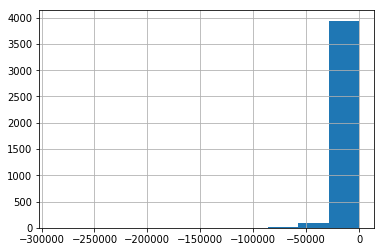

In [14]:
hoge.query("diff < 0")["abs_diff"].hist()

In [59]:
grid_params2={
    "xgb__n_estimators":[100,120,140],
    "xgb__max_depth":[7,8,9],
    "xgb__min_child_weight":[0,5,15],
    "xgb__learning_rate":[0.1,0.2],
    "xgb__random_state":[7777]
}
GCV2 = GridSearchCV(
    Pipeline(steps=rich_step),
    grid_params2,
    cv = 3,
    scoring="neg_mean_squared_error",
    verbose=3
)
GCV2.fit(temp_x_rich,temp_y_rich)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=100, xgb__random_state=7777 
[17:05:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=100, xgb__random_state=7777, score=-20533275032.002, total=   0.6s
[CV] xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=100, xgb__random_state=7777 
[17:05:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=100, xgb__random_state=7777, score=-15907774518.319, total=   0.6s
[CV] xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=100, xgb__random_state=7777 
[17:05:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=100, xgb__random_state=7777, score=-9381239329.321, total=   0.6s
[CV] xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=120, xgb__random_state=7777 
[17:05:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=120, xgb__random_state=7777, score=-20454789224.898, total=   0.7s
[CV] xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=120, xgb__random_state=7777 
[17:05:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=120, xgb__random_state=7777, score=-15826305572.156, total=   0.9s
[CV] xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_c

[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('drop_id',
                                        <my_class.drop_id object at 0x134b3b690>),
                                       ('parse_area',
                                        <my_class.parse_area_size object at 0x136792550>),
                                       ('parse_room',
                                        <my_class.parse_rooms object at 0x136792a50>),
                                       ('parse_old',
                                        <my_class.parse_how_old object at 0x136792990>),
                                       ('str_label',
                                        <my_class.structure_lab...
                                                     seed=None, silent=None,
                                                     subsample=1,
                                                     verbosity=1))],
         

In [810]:
crazy_pred = crazy["賃料"].median()
print(crazy_pred)
pred = pd.DataFrame([crazy_pred for i in range(len(crazy.index))])
print(np.sqrt(mean_squared_error(crazy["賃料"],pred)))

650000.0
301848.99189789325
